# MORE ON NUMPY

## COMPARISONS BETWEEN ARRAYS

In NumPy, you can perform various types of comparisons between arrays, such as element-wise comparisons, scalar comparisons, and more complex logical operations. Here are a few examples of comparisons using NumPy

## 1) Element-wise Comparison
You can compare two NumPy arrays element by element using comparison operators (==, !=, <, >, <=, >=).  

### Example: Element-wise equality comparison

In [7]:
import numpy as np
# Create two arrays
a = np.array([1, 2, 3, 4])
b = np.array([1, 3, 3, 5])

# Element-wise comparison
result = a == b
print(result)  


[ True False  True False]


Here, a == b compares each corresponding element of the arrays a and b. It returns an array of True or False based on whether the elements are equal.

### Example: Element-wise greater than comparison

In [9]:
result = a > b
print(result) 


[False False False False]


This compares each element of a with the corresponding element of b and returns True if the element in a is greater, otherwise False.

## 2) Scalar Comparison with an Array
You can compare a scalar value with every element in an array.

### Example: Comparison with a scalar

In [11]:
result = a > 2
print(result) 


[False False  True  True]


## 3) Logical Operations on Arrays
NumPy also allows you to combine multiple comparisons using logical operators (&, |, ~, etc.).

### Example: Combining comparisons with logical AND (&)

In [13]:
result = (a > 2) & (b < 5)
print(result)  


[False False  True False]


Here, the expression (a > 2) and (b < 5) are combined with the logical AND operator &. The result is True only if both conditions are True for each element.

### Example: Logical OR (|)

In [27]:
result = (a < 3) | (b > 3)
print(result)  


[ True  True False  True]


## BOOLEAN MASKING

### Filtering on 1-dim array

In [16]:

# Create a 1D array of random integers between 1 and 50
np.random.seed(0)
random_array = np.random.randint(1, 51, size=20)
print(random_array)

[45 48  1  4  4 40 10 20 22 37 24  7 25 25 13  2 39 40 24 47]


In [18]:
compare = random_array <= 25
print(compare)

[False False  True  True  True False  True  True  True False  True  True
  True  True  True  True False False  True False]


In [20]:
# Apply boolean masking to filter out all values greater than 25
filtered_array = random_array[compare]


In [28]:
# Print the original and filtered arrays
print("Original Array:", random_array)
print("Filtered Array (values <= 25):", filtered_array)

Original Array: [45 48  1  4  4 40 10 20 22 37 24  7 25 25 13  2 39 40 24 47]
Filtered Array (values <= 25): [1 4 4 2]


In [30]:
# we can use the short notation
filtered_array = random_array[random_array <= 4]
print(filtered_array)

[1 4 4 2]


### Filtering on matrices and tensors

Suppose we have the daily stock prices of 10 shares

In [79]:
np.random.seed(0)
# Simulate daily stock prices for 10 stocks over 30 days
# Assume stock prices range from $50 to $150
stock_prices = np.random.uniform(50, 150, (10, 30))
print(stock_prices)

[[104.88135039 121.51893664 110.27633761 104.4883183   92.36547993
  114.58941131  93.75872113 139.17730008 146.36627605  88.34415188
  129.17250381 102.88949198 106.80445611 142.55966383  57.10360582
   58.71292997  52.02183974 133.26198455 127.81567509 137.00121482
  147.86183422 129.91585642  96.14793623 128.05291763  61.82744259
  113.99210213  64.33532874 144.4668917  102.18483218  91.466194  ]
 [ 76.45556121 127.42336894  95.61503322 106.84339489  51.87898004
  111.76354971 111.20957227 111.69339969 144.37480785 118.18202991
   85.95079006  93.70319538 119.76311959  56.02254716 116.67667154
  117.06378696  71.03825611  62.89262977  81.54283509  86.37107709
  107.01967704  93.86015135 148.83738381  60.20448107  70.88767561
   66.13095179 115.31083255  75.32916025  96.63107729  74.4425592 ]
 [ 65.89695836  61.03751412 115.63295895  63.81829513  69.65823617
   86.87251707 132.09932298  59.71012758 133.79449075  59.60984079
  147.6459465   96.86512016 147.67610882 110.48455197 123.92

In [81]:
# I want to extract prices between 90 and 120
filter2 = (stock_prices <= 90) & (stock_prices < 120)
filter2

array([[False, False, False, False, False, False, False, False, False,
         True, False, False, False, False,  True,  True,  True, False,
        False, False, False, False, False, False,  True, False,  True,
        False, False, False],
       [ True, False, False, False,  True, False, False, False, False,
        False,  True, False, False,  True, False, False,  True,  True,
         True,  True, False, False, False,  True,  True,  True, False,
         True, False,  True],
       [ True,  True, False,  True,  True,  True, False,  True, False,
         True, False, False, False, False, False,  True,  True,  True,
         True,  True,  True, False,  True, False, False,  True, False,
         True, False, False],
       [ True, False,  True, False,  True,  True, False,  True, False,
         True, False,  True, False, False,  True, False, False, False,
         True, False, False, False, False,  True, False,  True, False,
        False, False, False],
       [False, False, False,

In [83]:
# we can use the short notation
stock_prices_filtered = stock_prices[filter2]
print(stock_prices_filtered)

[88.34415188 57.10360582 58.71292997 52.02183974 61.82744259 64.33532874
 76.45556121 51.87898004 85.95079006 56.02254716 71.03825611 62.89262977
 81.54283509 86.37107709 60.20448107 70.88767561 66.13095179 75.32916025
 74.4425592  65.89695836 61.03751412 63.81829513 69.65823617 86.87251707
 59.71012758 59.60984079 53.91877923 78.28069626 62.01965612 79.61401975
 61.8727719  81.79831794 56.41474963 76.53894909 59.39405108 81.85689525
 63.17978624 78.94060929 68.3191362  52.01075462 50.46954762 77.00079732
 74.87531435 72.30816326 79.74369509 89.65057408 51.91931983 80.15748167
 79.00776072 63.54740642 79.8282326  86.756187   60.02268873 64.94483047
 66.24929347 62.38199828 56.91669955 51.17140842 85.99780645 67.16296773
 55.43379883 69.99965249 51.85217945 72.39246881 84.53516807 53.18389295
 66.46941565 73.78928214 81.19449955 89.82210622 70.9843749  68.61930059
 72.7414628  75.43564818 55.80291603 81.1795882  87.77518393 67.96036776
 52.46787284 56.72496315 71.68969844 76.33223767 52

In [85]:
# take care, result is a 1-dim array
stock_prices_filtered.shape

(118,)

### What if i want to preserve the dimension of the original matrix?
First, i create a new matrix to save the original matrix

In [94]:
new_stock_prices = stock_prices

In [89]:
new_stock_prices[(new_stock_prices <= 90) & (new_stock_prices < 120)] = 0
print(new_stock_prices)

[[104.88135039 121.51893664 110.27633761 104.4883183   92.36547993
  114.58941131  93.75872113 139.17730008 146.36627605   0.
  129.17250381 102.88949198 106.80445611 142.55966383   0.
    0.           0.         133.26198455 127.81567509 137.00121482
  147.86183422 129.91585642  96.14793623 128.05291763   0.
  113.99210213   0.         144.4668917  102.18483218  91.466194  ]
 [  0.         127.42336894  95.61503322 106.84339489   0.
  111.76354971 111.20957227 111.69339969 144.37480785 118.18202991
    0.          93.70319538 119.76311959   0.         116.67667154
  117.06378696   0.           0.           0.           0.
  107.01967704  93.86015135 148.83738381   0.           0.
    0.         115.31083255   0.          96.63107729   0.        ]
 [  0.           0.         115.63295895   0.           0.
    0.         132.09932298   0.         133.79449075   0.
  147.6459465   96.86512016 147.67610882 110.48455197 123.92635794
    0.           0.           0.           0.           0

## Let's have a look at the original matrix

In [92]:
stock_prices

array([[104.88135039, 121.51893664, 110.27633761, 104.4883183 ,
         92.36547993, 114.58941131,  93.75872113, 139.17730008,
        146.36627605,   0.        , 129.17250381, 102.88949198,
        106.80445611, 142.55966383,   0.        ,   0.        ,
          0.        , 133.26198455, 127.81567509, 137.00121482,
        147.86183422, 129.91585642,  96.14793623, 128.05291763,
          0.        , 113.99210213,   0.        , 144.4668917 ,
        102.18483218,  91.466194  ],
       [  0.        , 127.42336894,  95.61503322, 106.84339489,
          0.        , 111.76354971, 111.20957227, 111.69339969,
        144.37480785, 118.18202991,   0.        ,  93.70319538,
        119.76311959,   0.        , 116.67667154, 117.06378696,
          0.        ,   0.        ,   0.        ,   0.        ,
        107.01967704,  93.86015135, 148.83738381,   0.        ,
          0.        ,   0.        , 115.31083255,   0.        ,
         96.63107729,   0.        ],
       [  0.        ,   0.    

We note that also the original has changed! WHY???

Let's see how to fix it

In [102]:
stock_prices = np.random.uniform(50, 150, (10, 30))

new_stock_prices = stock_prices.copy()

In [106]:
new_stock_prices[(new_stock_prices <= 90) & (new_stock_prices < 120)] = 0
new_stock_prices

array([[  0.        ,   0.        , 118.0348666 ,   0.        ,
        110.7249374 ,  97.76465029,   0.        ,   0.        ,
        101.45127433,   0.        ,  95.65198913,   0.        ,
        147.04936936,   0.        ,   0.        ,   0.        ,
        109.10269009, 115.91764719,   0.        , 149.92779939,
          0.        , 122.1406668 , 113.75826945, 131.30538632,
        147.62256635, 138.97936564, 126.45619744, 119.82484778,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  93.22814812, 102.19962736,
        127.30835541, 145.87409231,   0.        ,   0.        ,
        108.9694723 , 124.53980739, 134.81503803, 143.58320802,
        148.34262423,   0.        ,   0.        ,   0.        ,
        118.49344387, 115.67619584, 136.20625959,   0.        ,
         99.77769078, 108.10819297,   0.        ,   0.        ,
        135.95808364,   0.        ,  97.06209039,   0.        ,
         95.70587613, 147.99623263],
       [ 92.37063535, 135.7124

In [108]:
stock_prices

array([[ 67.46583854,  82.79880009, 118.0348666 ,  56.32076183,
        110.7249374 ,  97.76465029,  78.39999768,  73.84132809,
        101.45127433,  86.79275805,  95.65198913,  83.74773818,
        147.04936936,  63.34394317,  59.68039532,  84.33917288,
        109.10269009, 115.91764719,  89.72567472, 149.92779939,
         85.18929962, 122.1406668 , 113.75826945, 131.30538632,
        147.62256635, 138.97936564, 126.45619744, 119.82484778,
         83.54981697,  64.76855782],
       [ 56.26360031,  74.19017042,  93.22814812, 102.19962736,
        127.30835541, 145.87409231,  61.73204804,  60.70041402,
        108.9694723 , 124.53980739, 134.81503803, 143.58320802,
        148.34262423,  89.98016922,  88.03351835,  64.78086767,
        118.49344387, 115.67619584, 136.20625959,  59.72579948,
         99.77769078, 108.10819297,  74.155704  ,  66.90254061,
        135.95808364,  55.85349222,  97.06209039,  61.58340013,
         95.70587613, 147.99623263],
       [ 92.37063535, 135.7124

## Exercise: Stock Price Analysis
Scenario: You have daily stock prices of 10 stocks over 30 days in a 2D NumPy array. You need to analyze the data based on certain criteria.

## Task:

- Find all the stock prices in the dataset that are greater than 120.  
- Replace all stock prices below 80 with the value 80 (to simulate a price floor).  
- Count how many prices were adjusted to 80.  
Starter Code:

In [175]:

# Simulate stock prices: 10 stocks over 30 days, prices range from $50 to $150
np.random.seed(0)
stock_prices = np.random.uniform(50, 150, (10, 30))

# 1. Find all prices greater than $120
# 2. Replace all prices below $80 with $80
# Your code here
# 3. Count how many prices were adjusted to $80
# Your code here

## Solutions

In [173]:
# Print the original stock prices
print("Original stock prices:")
print(stock_prices)

# 1. Find all prices greater than $120
high_prices = stock_prices[stock_prices > 120]
print("\nPrices greater than $120:")
print(high_prices)

# 2. Replace all prices below $80 with $80
stock_prices[stock_prices < 80] = 80
print("\nStock prices after applying the price floor of $80:")
print(stock_prices)

# 3. Count how many prices were adjusted to $80
adjusted_count = np.sum(stock_prices == 80)
print(f"\nNumber of prices adjusted to $80: {adjusted_count}")

Original stock prices:
[[104.88135039 121.51893664 110.27633761 104.4883183   92.36547993
  114.58941131  93.75872113 139.17730008 146.36627605  88.34415188
  129.17250381 102.88949198 106.80445611 142.55966383  57.10360582
   58.71292997  52.02183974 133.26198455 127.81567509 137.00121482
  147.86183422 129.91585642  96.14793623 128.05291763  61.82744259
  113.99210213  64.33532874 144.4668917  102.18483218  91.466194  ]
 [ 76.45556121 127.42336894  95.61503322 106.84339489  51.87898004
  111.76354971 111.20957227 111.69339969 144.37480785 118.18202991
   85.95079006  93.70319538 119.76311959  56.02254716 116.67667154
  117.06378696  71.03825611  62.89262977  81.54283509  86.37107709
  107.01967704  93.86015135 148.83738381  60.20448107  70.88767561
   66.13095179 115.31083255  75.32916025  96.63107729  74.4425592 ]
 [ 65.89695836  61.03751412 115.63295895  63.81829513  69.65823617
   86.87251707 132.09932298  59.71012758 133.79449075  59.60984079
  147.6459465   96.86512016 147.67610

# DATA MANIPULATION WITH PANDAS
Pandas is a library, based on NumPy, that provides a new object type, the **DataFrame**.  
DataFrames are essentially multidimensional matrices which however have **"labels" on the rows and columns** and can **host heterogeneous types** (numpy ndarrays can host data of the same type) and/or missing data.   
DataFrames are therefore convenient for managing data.

Let's now import the Pandas library

In [3]:
import pandas as pd

## Loading external data
Let's load a file that contains sales data. It is in CSV format which represents one of the simplest ways to represent data in tabular form within a simple text file.

In [5]:
# Loading file CSV
url = 'https://raw.githubusercontent.com/pal-dev-labs/Python-for-Economic-Applications-2024-2025/refs/heads/main/Data/sales_data.csv'
df = pd.read_csv(url)

# for the moment just run this command
df.index = [f"Car_{i}" for i in range(1, len(df) + 1)]

# pd.read

In [405]:
type(df)

pandas.core.frame.DataFrame

In [411]:
# let's have a look
df

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
Car_1,0,Acura,Integra,16.919,21.50,142.516144,53481,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
Car_2,1,Acura,TL,39.384,28.40,383.026416,39441,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
Car_3,2,Acura,CL,14.114,0.00,165.928640,44114,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000,0
Car_4,3,Acura,RL,8.588,42.00,63.259267,98103,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0
Car_5,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Car_153,152,Volvo,V40,3.545,24.40,70.518707,28535,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
Car_154,153,Volvo,S70,15.245,27.50,171.875269,117895,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0
Car_155,154,Volvo,V70,17.531,28.80,172.154270,102228,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,0
Car_156,155,Volvo,C70,3.493,45.50,29.538936,100522,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


## Overall view of the table
Take care of Dtype **object**

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Car_1 to Car_157
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             157 non-null    int64  
 1   Manufacturer           157 non-null    object 
 2   Model                  157 non-null    object 
 3   Sales_in_thousands     157 non-null    float64
 4   Price_in_thousands     157 non-null    float64
 5   TV Advert (thousands)  157 non-null    float64
 6   Social Advert          157 non-null    int64  
 7   Engine_size            157 non-null    float64
 8   Horsepower             157 non-null    float64
 9   Wheelbase              157 non-null    float64
 10  Width                  157 non-null    float64
 11  Length                 157 non-null    float64
 12  Curb_weight            157 non-null    float64
 13  Fuel_capacity          157 non-null    float64
 14  Fuel_efficiency        157 non-null    float64
 15  Lat

## Accessing dataframe data

The DataFrame has an index attribute that gives **access to the ROWS**

In [413]:
df.index

Index(['Car_1', 'Car_2', 'Car_3', 'Car_4', 'Car_5', 'Car_6', 'Car_7', 'Car_8',
       'Car_9', 'Car_10',
       ...
       'Car_148', 'Car_149', 'Car_150', 'Car_151', 'Car_152', 'Car_153',
       'Car_154', 'Car_155', 'Car_156', 'Car_157'],
      dtype='object', length=157)

The DataFrame has a columns attribute that gives **access to COLUMNS**

In [415]:
df.columns


Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Sales_in_thousands',
       'Price_in_thousands', 'TV Advert (thousands)', 'Social Advert',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'Awarded'],
      dtype='object')

While with Numpy we cannot add "Labels" to rows and columns, with Pandas it is possible.


We can use index to access the rows

In [425]:
# slicing by EXPLICIT index
df['Car_10':'Car_15']

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
Car_10,9,BMW,528i,17.527,38.900,120.393738,74940,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724,0
Car_11,10,Buick,Century,91.561,21.975,867.324050,41587,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,11/2/2011,71.181451,0
Car_12,11,Buick,Regal,39.350,25.300,397.931457,17406,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,9/3/2011,95.636703,0
Car_13,12,Buick,Park Avenue,27.851,31.965,237.483637,15035,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0,3/23/2012,85.828408,0
Car_14,13,Buick,LeSabre,83.257,27.885,804.433061,3891,3.8,205.0,112.2,73.5,200.0,3.591,17.5,25.0,7/23/2011,84.254526,0
Car_15,14,Cadillac,DeVille,63.729,39.895,603.374267,988,4.6,275.0,115.3,74.5,207.2,3.978,18.5,22.0,2/23/2012,113.854598,0


In [441]:
# slicing by IMPLICIT index
df[3:5]

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
Car_4,3,Acura,RL,8.588,42.00,63.259267,98103,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0
Car_5,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0


In [436]:
# Let's try to extract a COLUMN
a = df['Manufacturer']   # in this case I access the column
print(a)

Car_1      Acura
Car_2      Acura
Car_3      Acura
Car_4      Acura
Car_5       Audi
           ...  
Car_153    Volvo
Car_154    Volvo
Car_155    Volvo
Car_156    Volvo
Car_157    Volvo
Name: Manufacturer, Length: 157, dtype: object


Note a column is of type **Series**. A DataFrame is composed by many smaller objects (a column) of type **Series** 

In [373]:
type(a)

pandas.core.series.Series

In [439]:
# Let's try to extract two COLUMNS
# we use a list inside the first []

df[['Manufacturer','Sales_in_thousands']]

,Manufacturer,Sales_in_thousands
Car_1,Acura,16.919
Car_2,Acura,39.384
Car_3,Acura,14.114
Car_4,Acura,8.588
Car_5,Audi,20.397
...,...,...
Car_153,Volvo,3.545
Car_154,Volvo,15.245
Car_155,Volvo,17.531
Car_156,Volvo,3.493


In [ ]:
# I can also combine (columns with implicit index)
df['Price_in_thousands'][1:9]

### How can we access a single element of the DataFrame?  
As with ndarrays we can use the [x,y] notation, using the **iloc method**  
Remember that the numbering starts from [0,0]

In [212]:
df.iloc[1,1]

'Acura'

We can also use slicing notation

In [157]:
# extract second row
df.iloc[2,:]

Unnamed: 0                       2
Manufacturer                 Acura
Model                           CL
Sales_in_thousands          14.114
Price_in_thousands             0.0
TV Advert (thousands)    165.92864
Social Advert                44114
Engine_size                    3.2
Horsepower                   225.0
Wheelbase                    106.9
Width                         70.6
Length                       192.0
Curb_weight                   3.47
Fuel_capacity                 17.2
Fuel_efficiency               26.0
Latest_Launch             1/4/2012
Power_perf_factor              0.0
Awarded                          0
Name: 2, dtype: object

In [163]:
# we extract the ninth column
df.iloc[:,9]

0      101.2
1      108.1
2      106.9
3      114.6
4      102.6
       ...  
152    100.5
153    104.9
154    104.9
155    104.9
156    109.9
Name: Wheelbase, Length: 157, dtype: float64

In [165]:
# we extract from the 3rd to the 7th row and from the 9th to the 10th column
df.iloc[2:6,8:10]

,Horsepower,Wheelbase
2,225.0,106.9
3,210.0,114.6
4,150.0,102.6
5,200.0,108.7


It's also possible to specify specific positions inserting lists as parameters

In [171]:
df.iloc[[2,5,7],[3,4,9]]

,Sales_in_thousands,Price_in_thousands,Wheelbase
2,14.114,0.00,106.9
5,18.780,33.95,108.7
7,19.747,26.99,107.3


The dataframe columns are also FIELDS of the dataframe object.
We can then use the df.fields command

In [181]:
df.Price_in_thousands

0      21.50
1      28.40
2       0.00
3      42.00
4      23.99
       ...  
152    24.40
153    27.50
154    28.80
155    45.50
156    36.00
Name: Price_in_thousands, Length: 157, dtype: float64

## NOW YOU TRY IT
- Extract the rows from 20 to 40 from the table
- Extract the 'Engine_size' and 'Horsepower' columns from the table
- Extract rows from 15 to 45 of the 'Price_in_thousands' and 'Fuel_capacity' columns
- Extract all rows from the 4th column to the end
- extracts all the information corresponding to line 56

## Filters to extract information from the table

In [228]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Sales_in_thousands',
       'Price_in_thousands', 'TV Advert (thousands)', 'Social Advert',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'Awarded'],
      dtype='object')

In [232]:
# Let's try to take just one column
year = df['Price_in_thousands']

In [234]:
year

0      21.50
1      28.40
2       0.00
3      42.00
4      23.99
       ...  
152    24.40
153    27.50
154    28.80
155    45.50
156    36.00
Name: Price_in_thousands, Length: 157, dtype: float64

### I want to extract only ten rows

In [246]:
# we extract ten LINES
b = year.iloc[10:20]
print(b)

10    21.975
11    25.300
12    31.965
13    27.885
14    39.895
15    44.475
16    39.665
17    31.010
18    46.225
19    13.260
Name: Price_in_thousands, dtype: float64


### I want to check which rows have the value 39.895  
Let's use boolean comparison

In [256]:
b == 39.895

10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
Name: Price_in_thousands, dtype: bool

### I notice that the check returns TRUE on each line in which the condition is verified.

### I can also use expressions of logical operators like (20 < b) & (b < 35)
With dataframe -
- **&** is the bitwise operator **AND**
- **|** is the bitwise operator **or**

In [ ]:
b 

In [286]:
(20 < b) & (b < 35)

10     True
11     True
12     True
13     True
14    False
15    False
16    False
17     True
18    False
19    False
Name: Price_in_thousands, dtype: bool

### The interesting thing is that if I apply that filter to the entire dataframe, we can filter out the unwanted elements

In [297]:
year = df['Price_in_thousands']
filter1 = (20 < year) & (year < 35)

In [299]:
filter1

0       True
1       True
2      False
3      False
4       True
       ...  
152     True
153     True
154     True
155    False
156    False
Name: Price_in_thousands, Length: 157, dtype: bool

In [301]:
df_filtered = df[filter1]
df_filtered

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
0,0,Acura,Integra,16.919,21.50,142.516144,53481,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
1,1,Acura,TL,39.384,28.40,383.026416,39441,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
4,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
5,5,Audi,A6,18.780,33.95,182.176329,19639,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,0
7,7,BMW,323i,19.747,26.99,202.524353,12758,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,147,Volkswagen,Passat,51.102,21.20,491.571192,41121,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,0
151,151,Volvo,S40,16.957,23.40,153.414842,83642,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057,0
152,152,Volvo,V40,3.545,24.40,70.518707,28535,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
153,153,Volvo,S70,15.245,27.50,171.875269,117895,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0


### As always it's possible to use a more compact syntax

In [306]:
df_filtered = df[df['Price_in_thousands']==(20 < year) & (year < 35)]
df_filtered

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
2,2,Acura,CL,14.114,0.0,165.928640,44114,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,0.0,0
33,33,Chrysler,Town & Country,53.480,0.0,514.676503,69913,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7/13/2011,0.0,0


In [313]:
df_filtered = df[(df['Price_in_thousands']>20)&(df['Price_in_thousands']<35)]
df_filtered

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
0,0,Acura,Integra,16.919,21.50,142.516144,53481,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
1,1,Acura,TL,39.384,28.40,383.026416,39441,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
4,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
5,5,Audi,A6,18.780,33.95,182.176329,19639,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,0
7,7,BMW,323i,19.747,26.99,202.524353,12758,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,147,Volkswagen,Passat,51.102,21.20,491.571192,41121,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,0
151,151,Volvo,S40,16.957,23.40,153.414842,83642,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057,0
152,152,Volvo,V40,3.545,24.40,70.518707,28535,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
153,153,Volvo,S70,15.245,27.50,171.875269,117895,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0


In [ ]:
#  OR operator
df_filtered = df[(df['Year']==1677) | (df['Year']==1679)]
df_filtered

# NOW YOU TRY IT
- Extract the rows with Engine_size == 1.8
- Extract the rows with the Sales_in_thousands between 35 and 45
- Extract the rows that have a number of Price_in_thousands greater than 40 and Social Advert greater than 50000. Print only the column ['Manufacturer','Model','Price_in_thousands','Social Advert']

In [341]:
#df1 = df[df['Engine_size']==1.8]
#df1

In [339]:
#df2 = df[(df['Sales_in_thousands']>35)&(df['Sales_in_thousands']<45)]
#df2

In [346]:
#df3 = df[(df['Price_in_thousands']>40)&(df['Social Advert']>50000)][['Manufacturer','Model','Price_in_thousands','Social Advert']]
#df3


## NaN: Not A Number

The NaN value is used in Pandas to represent a missing value.
There are several methods, among which we report:

- ``isnull()``: creates a boolean mask highlighting the NaNs with True
- ``notnull()``: the opposite of ``isnull()``
- ``dropna()``: returns a filtered version of the dataframe without NaN
- ``fillna()``: returns a copy of the dataframe with the NaN data replaced by other values

In [455]:
# Loading file CSV
url = 'https://raw.githubusercontent.com/pal-dev-labs/Python-for-Economic-Applications-2024-2025/refs/heads/main/Data/earthquakes.csv'
df = pd.read_csv(url)

In [457]:
df

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2023.0,1.0,28.0,18.0,14.0,45.0,NaN,NaN,IRAN: KHVOY (KHOY),38.424,...,NaN,NaN,1017.0,4.0,NaN,3.0,370.0,3.0,NaN,4.0
6346,2023.0,2.0,6.0,1.0,17.0,35.0,5873.0,NaN,TURKEY; SYRIA,37.166,...,NaN,NaN,206300.0,4.0,NaN,4.0,100000.0,4.0,NaN,4.0
6347,2023.0,2.0,6.0,10.0,24.0,49.0,NaN,NaN,TURKEY; SYRIA,38.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6348,2023.0,2.0,9.0,6.0,28.0,0.0,NaN,NaN,INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA,-2.635,...,NaN,NaN,NaN,NaN,NaN,1.0,15.0,1.0,28.0,1.0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                6349 non-null   float64
 1   Mo                                  5939 non-null   float64
 2   Dy                                  5783 non-null   float64
 3   Hr                                  4300 non-null   float64
 4   Mn                                  4095 non-null   float64
 5   Sec                                 4390 non-null   float64
 6   Tsu                                 1958 non-null   float64
 7   Vol                                 77 non-null     float64
 8   Location Name                       6348 non-null   object 
 9   Latitude                            6297 non-null   float64
 10  Longitude                           6297 non-null   float64
 11  Focal Depth (km)                    3384 no

In [459]:
df.isnull()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,False,False,...,True,True,True,True,True,False,True,False,True,True
4,False,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,False,False,False,False,False,False,True,True,False,False,...,True,True,False,False,True,False,False,False,True,False
6346,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,False,False,False,True,False
6347,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
6348,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False


In [461]:
df.notnull()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
4,True,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,True,True,True,True,True,True,False,False,True,True,...,False,False,True,True,False,True,True,True,False,True
6346,True,True,True,True,True,True,True,False,True,True,...,False,False,True,True,False,True,True,True,False,True
6347,True,True,True,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
6348,True,True,True,True,True,True,False,False,True,True,...,False,False,False,False,False,True,True,True,True,True


In [463]:
df.fillna("0")

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-2150.0,0,0,0,0,0.0,0,0,"JORDAN: BAB-A-DARAA,AL-KARAK",31.1,...,0,0,0,0,0,0,0,0,0,0
2,-2000.0,0,0,0,0,0,1.0,0,SYRIA: UGARIT,35.683,...,0,0,0,0,0,0,0,0,0,0
3,-2000.0,0,0,0,0,0,0,0,TURKMENISTAN: W,38.0,...,0,0,0,0,0,1.0,0,1.0,0,0
4,-1610.0,0,0,0,0,0,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.4,...,0,0,0,0,0,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2023.0,1.0,28.0,18.0,14.0,45.0,0,0,IRAN: KHVOY (KHOY),38.424,...,0,0,1017.0,4.0,0,3.0,370.0,3.0,0,4.0
6346,2023.0,2.0,6.0,1.0,17.0,35.0,5873.0,0,TURKEY; SYRIA,37.166,...,0,0,206300.0,4.0,0,4.0,100000.0,4.0,0,4.0
6347,2023.0,2.0,6.0,10.0,24.0,49.0,0,0,TURKEY; SYRIA,38.024,...,0,0,0,0,0,0,0,0,0,0
6348,2023.0,2.0,9.0,6.0,28.0,0.0,0,0,INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA,-2.635,...,0,0,0,0,0,1.0,15.0,1.0,28.0,1.0


## Now we can eliminate the NaNs by substituting a more tractable value. We put the string "0"

In [465]:
newdf = df.fillna("0")

In [467]:
newdf

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-2150.0,0,0,0,0,0.0,0,0,"JORDAN: BAB-A-DARAA,AL-KARAK",31.1,...,0,0,0,0,0,0,0,0,0,0
2,-2000.0,0,0,0,0,0,1.0,0,SYRIA: UGARIT,35.683,...,0,0,0,0,0,0,0,0,0,0
3,-2000.0,0,0,0,0,0,0,0,TURKMENISTAN: W,38.0,...,0,0,0,0,0,1.0,0,1.0,0,0
4,-1610.0,0,0,0,0,0,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.4,...,0,0,0,0,0,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2023.0,1.0,28.0,18.0,14.0,45.0,0,0,IRAN: KHVOY (KHOY),38.424,...,0,0,1017.0,4.0,0,3.0,370.0,3.0,0,4.0
6346,2023.0,2.0,6.0,1.0,17.0,35.0,5873.0,0,TURKEY; SYRIA,37.166,...,0,0,206300.0,4.0,0,4.0,100000.0,4.0,0,4.0
6347,2023.0,2.0,6.0,10.0,24.0,49.0,0,0,TURKEY; SYRIA,38.024,...,0,0,0,0,0,0,0,0,0,0
6348,2023.0,2.0,9.0,6.0,28.0,0.0,0,0,INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA,-2.635,...,0,0,0,0,0,1.0,15.0,1.0,28.0,1.0


## Checking for NaN values with Numpy array (ndarray)
You can check if elements are NaN (Not a Number) using np.isnan().

### Example: Checking for NaN values

In [194]:
c = np.array([1.0, np.nan, 2.0, np.nan])
print(c)

[ 1. nan  2. nan]


In [196]:
result = np.isnan(c)
print(result)  


[False  True False  True]


In [111]:
# Import data and clean up the index
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(data_url, 
                        sheet_name='all', 
                        header=2, 
                        index_col=0).iloc[1:]
df_fig5.index = df_fig5.index.astype(int)
df_fig5

,UK,US,France,Castile
1600,72.455009,NaN,NaN,48.559223
1601,84.609771,NaN,NaN,41.760932
1602,74.349258,NaN,NaN,40.158477
1603,70.718615,NaN,NaN,40.595510
1604,63.773036,NaN,NaN,44.480248
...,...,...,...,...
1996,6255.638155,1582.585125,170224.590163,31096.461579
1997,6452.279040,1619.557486,172375.143780,31709.397090
1998,6673.500036,1644.849943,173555.795450,32291.052174
1999,6775.917163,1680.729939,174409.068780,33037.087098


In [471]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [121]:
# Import required libraries
import yfinance as yf
import matplotlib.pyplot as plt



In [119]:
# if you're working locally install the yfinance Module
# uncomment the below line and run the cell
# !pip install yfinance

In [123]:
# Define a list of 10 stock symbols (e.g., tech and other industries)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'NFLX', 'ADBE', 'ORCL']

# Define the time range for data
start_date = '2022-01-01'
end_date = '2023-01-01'

# Fetch stock data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [125]:
data

Ticker,AAPL,ADBE,AMZN,GOOGL,META,MSFT,NFLX,NVDA,ORCL,TSLA
Date,,,,,,,,,,
2022-01-03,179.076569,564.369995,170.404495,144.633362,337.523773,326.287720,597.369995,30.073061,84.079712,399.926666
2022-01-04,176.803802,554.000000,167.522003,144.042831,335.519775,320.692780,591.150024,29.243383,84.978867,383.196655
2022-01-05,172.100861,514.429993,164.356995,137.434677,323.196899,308.382111,567.520020,27.560068,82.702316,362.706665
2022-01-06,169.227936,514.119995,163.253998,137.407257,331.461975,305.945282,553.289978,28.133154,82.894333,354.899994
2022-01-07,169.395172,510.700012,162.554001,136.678558,330.794006,306.101257,541.059998,27.203632,84.017639,342.320007
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.487778,338.450012,85.250000,89.009598,117.685669,234.875443,294.959991,15.195994,78.677994,123.150002
2022-12-27,128.676865,335.089996,83.040001,87.174141,116.529144,233.134018,284.170013,14.111710,78.804482,109.099998
2022-12-28,124.728355,328.329987,81.820000,85.807526,115.272926,230.743240,276.880005,14.026764,78.171951,112.709999


In [127]:
data.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [129]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [131]:
# Display the first few rows of the dataframe
print("First few rows of the stock data:")
print(data.head())

First few rows of the stock data:
Ticker            AAPL        ADBE        AMZN       GOOGL        META  \
Date                                                                     
2022-01-03  179.076569  564.369995  170.404495  144.633362  337.523773   
2022-01-04  176.803802  554.000000  167.522003  144.042831  335.519775   
2022-01-05  172.100861  514.429993  164.356995  137.434677  323.196899   
2022-01-06  169.227936  514.119995  163.253998  137.407257  331.461975   
2022-01-07  169.395172  510.700012  162.554001  136.678558  330.794006   

Ticker            MSFT        NFLX       NVDA       ORCL        TSLA  
Date                                                                  
2022-01-03  326.287720  597.369995  30.073061  84.079712  399.926666  
2022-01-04  320.692780  591.150024  29.243383  84.978867  383.196655  
2022-01-05  308.382111  567.520020  27.560068  82.702316  362.706665  
2022-01-06  305.945282  553.289978  28.133154  82.894333  354.899994  
2022-01-07  306.10125

We can extract a time window applying slice notation

In [141]:
# Filter data between May and July (inclusive) of 2022
window= data['2022-05-01':'2022-07-31']
window

Ticker,AAPL,ADBE,AMZN,GOOGL,META,MSFT,NFLX,NVDA,ORCL,TSLA
Date,,,,,,,,,,
2022-05-02,155.612228,407.290009,124.500000,116.295029,210.496231,277.852112,199.460007,19.505234,71.324722,300.980011
2022-05-03,157.109634,407.579987,124.253502,117.044182,211.393524,275.224701,199.869995,19.574133,70.640396,303.083344
2022-05-04,163.552429,423.350006,125.928497,121.959007,222.739349,283.233917,204.009995,20.305094,72.490997,317.540009
2022-05-05,154.439896,400.510010,116.406998,116.217728,207.654785,270.897736,188.320007,18.817213,70.168121,291.093323
2022-05-06,155.169968,391.010010,114.772499,115.460594,203.158310,268.338654,180.970001,18.648449,69.869316,288.549988
...,...,...,...,...,...,...,...,...,...,...
2022-07-25,150.898056,391.959991,121.139999,107.244446,166.149734,253.397400,218.509995,17.003397,72.476341,268.433319
2022-07-26,149.566162,379.260010,114.809998,104.760590,158.672256,246.612823,213.910004,16.512989,71.672752,258.859985
2022-07-27,154.686523,392.779999,120.970001,112.780739,169.070953,263.099426,226.750000,17.768467,73.454185,274.820007


we can extract information for one stock

In [145]:
aapl_data = data['AAPL']

In [149]:
# Calculate daily returns (percentage change)
apple_daily_returns = aapl_data.pct_change() * 100  # Convert to percentage
apple_daily_returns

Date
2022-01-03         NaN
2022-01-04   -1.269159
2022-01-05   -2.659978
2022-01-06   -1.669326
2022-01-07    0.098823
                ...   
2022-12-23   -0.279827
2022-12-27   -1.387803
2022-12-28   -3.068546
2022-12-29    2.832468
2022-12-30    0.246867
Name: AAPL, Length: 251, dtype: float64

### Next Steps: plot data

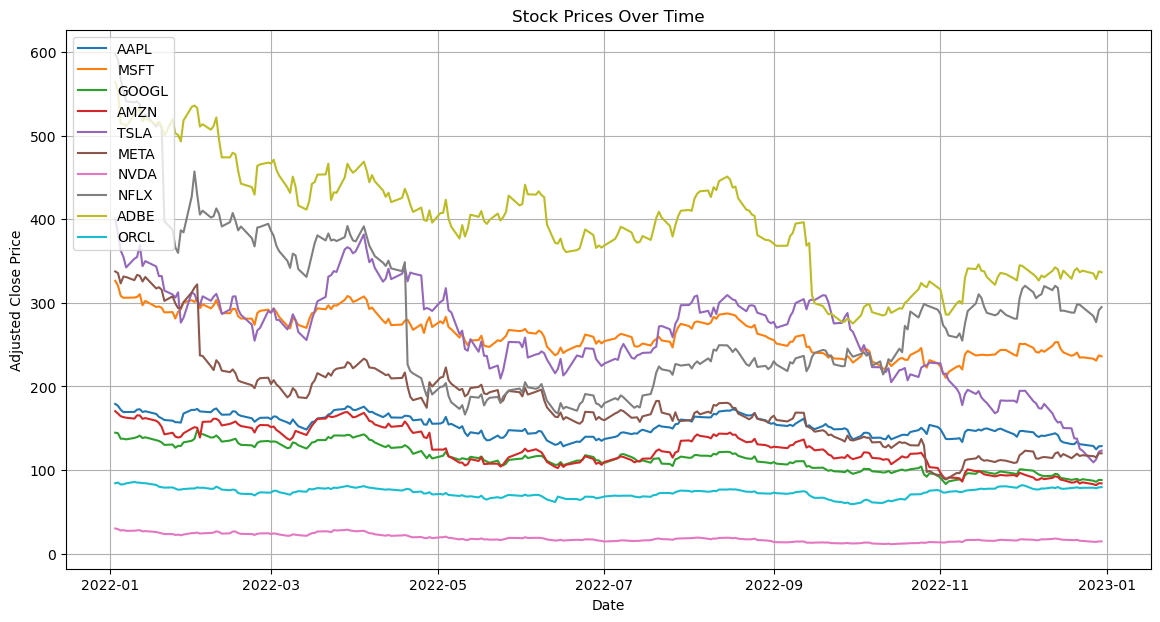

In [155]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(loc="upper left", fontsize=10)
plt.grid()
plt.show()
